In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [86]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [87]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [88]:
df.shape

(10000, 14)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [90]:
df.duplicated().sum()

0

In [91]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [92]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [93]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [94]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [95]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [96]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)

In [97]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['Exited']),df['Exited'],test_size=0.2,random_state=42)

In [100]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0,2,1,1,179093,0,0,1
1561,632,42,4,119624,2,1,1,195978,1,0,1
1670,559,24,3,114739,1,1,0,85891,0,1,1
6087,561,27,9,135637,1,1,0,153080,0,0,0
6669,517,56,9,142147,1,0,0,39488,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712,1,1,1,69381,0,0,1
5191,682,58,1,0,1,1,1,706,0,0,0
5390,735,38,1,0,3,0,0,92220,0,0,0
860,667,43,8,190227,1,1,0,97508,0,0,1


In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler=StandardScaler()

In [103]:
X_train_scaled=scaler.fit_transform(X_train)

In [104]:
X_test_scaled = scaler.transform(X_test)

In [105]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [106]:
model = Sequential()


model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [128]:
import matplotlib.pyplot as plt

In [152]:
history=model.fit(X_train_scaled,y_train,epochs=75,validation_split=0.2)

Epoch 1/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8684 - loss: 0.3208 - val_accuracy: 0.8544 - val_loss: 0.3535
Epoch 2/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - loss: 0.3137 - val_accuracy: 0.8544 - val_loss: 0.3534
Epoch 3/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8686 - loss: 0.3196 - val_accuracy: 0.8575 - val_loss: 0.3527
Epoch 4/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8709 - loss: 0.3160 - val_accuracy: 0.8537 - val_loss: 0.3529
Epoch 5/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8677 - loss: 0.3204 - val_accuracy: 0.8531 - val_loss: 0.3533
Epoch 6/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.3107 - val_accuracy: 0.8531 - val_loss: 0.3563
Epoch 7/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8686 - loss: 0.3137 - val_accuracy: 0.8550 - val_loss: 0.3528
Epoch 8/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8650 - loss: 0.3205 - val_accuracy: 0.

In [153]:
history.history

{'accuracy': [0.8695312738418579,
  0.867968738079071,
  0.8689062595367432,
  0.8690624833106995,
  0.8689062595367432,
  0.8690624833106995,
  0.8692187666893005,
  0.8676562309265137,
  0.8701562285423279,
  0.8700000047683716,
  0.8687499761581421,
  0.8709375262260437,
  0.8685937523841858,
  0.8687499761581421,
  0.8682812452316284,
  0.8687499761581421,
  0.8675000071525574,
  0.8696874976158142,
  0.8684375286102295,
  0.8689062595367432,
  0.8676562309265137,
  0.8684375286102295,
  0.867968738079071,
  0.8689062595367432,
  0.8687499761581421,
  0.8687499761581421,
  0.8714062571525574,
  0.8700000047683716,
  0.8687499761581421,
  0.8682812452316284,
  0.8682812452316284,
  0.8684375286102295,
  0.8693749904632568,
  0.8675000071525574,
  0.8673437237739563,
  0.8684375286102295,
  0.8693749904632568,
  0.8684375286102295,
  0.8689062595367432,
  0.8681250214576721,
  0.8689062595367432,
  0.8665624856948853,
  0.8701562285423279,
  0.8681250214576721,
  0.8696874976158142,


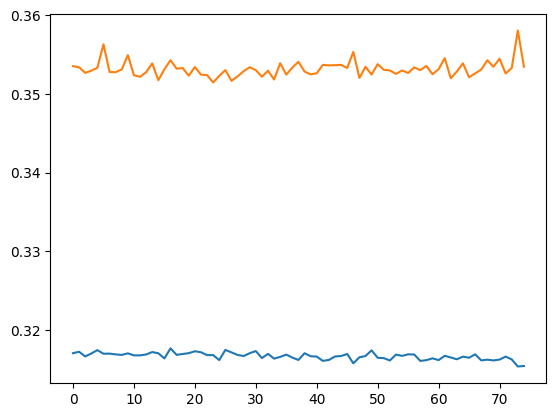

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

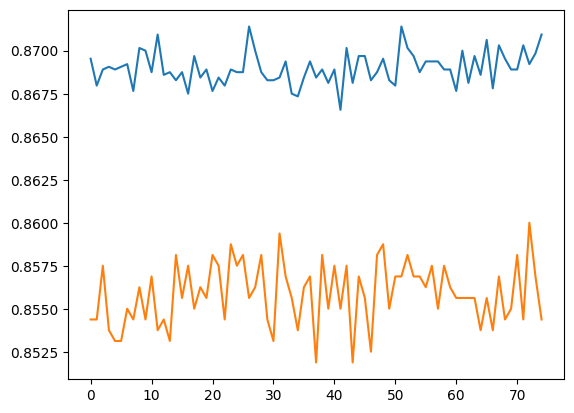

In [157]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [158]:
model.layers[0].get_weights()

[array([[ 1.31111100e-01,  7.25099370e-02, -1.17925785e-01,
          5.12951873e-02, -1.24312397e-02,  4.22807746e-02,
          8.07472244e-02,  1.40093029e-01,  2.02697277e-01,
          4.77670789e-01, -7.21744671e-02],
        [-9.18775573e-02, -8.25637802e-02, -4.23497766e-01,
          1.21427381e+00,  1.28415644e-01,  6.39864087e-01,
         -2.55134940e-01, -2.94294596e-01, -1.08963490e+00,
         -7.58527517e-01,  1.88307330e-01],
        [ 3.83563399e-01, -5.58709651e-02,  2.09702581e-01,
          2.89364368e-01, -1.97821520e-02,  5.94284497e-02,
          9.30148587e-02,  2.63233155e-01,  3.92993867e-01,
         -2.12284461e-01,  7.12916162e-03],
        [-3.31059769e-02, -2.70640969e-01,  1.55125946e-01,
         -6.69223368e-02,  4.39159065e-01, -3.23069215e-01,
          4.33270216e-01, -2.30151325e-01, -1.35892676e-03,
         -2.79605210e-01,  8.95311713e-01],
        [-9.02367830e-01,  7.40569413e-01,  8.17755759e-01,
         -9.33338031e-02,  1.45970285e+00, -

In [159]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [160]:
y_pred=np.where(y_log>0.5,1,0)

In [161]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8525